# **NLP Mini-Project** - Book Genre Classification Model

**Team Members:**

1. Aayush Joshi (2448003)
2. Anushka Sen (2448012)
3. Simran Kaur (2448051)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

#Importing the dataset
file_path = '/content/drive/My Drive/NLP Mini-Project/data.csv'
df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB


# **Data Pre-processing and Cleaning**

In [ ]:
#Checking for Null-Values

df.isnull().sum()

,0
index,0
title,0
genre,0
summary,0


The dataset is clean and contains no missing values.

In [ ]:
#Dropping the index column because it is redundant

df.drop('index', axis=1, inplace=True)

In [ ]:
#Final Dataset post removal of index column

df.head(5)

,title,genre,summary
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


## **Duplicate check**

In [ ]:
#Checking for duplicate rows

df.duplicated().sum()

17

In [ ]:
# Shows all rows that have duplicates
df[df.duplicated(keep=False)]

,title,genre,summary
3037,The Radium Girls: The Dark Story of America's ...,history,The incredible true story of the women who fou...
3038,The Radium Girls: The Dark Story of America's ...,history,The incredible true story of the women who fou...
3608,A Lie for a Lie,sports,From the New York Times bestselling author of ...
3609,Rookie Move,sports,The first novel in a sexy new series featuring...
3610,The Raven King,sports,"The Foxes are a fractured mess, but their late..."
3611,The King's Men,sports,Neil Josten is out of time. He knew when he ca...
3612,The Play,sports,A brand-new standalone novel in the New York T...
3613,Hands Down,sports,"Before he was Big Texas, he was Zac the Snack ..."
3614,Taking a Shot,sports,"If you want to score, you have to get in the g..."
3615,What I Talk About When I Talk About Running,sports,"In 1982, having sold his jazz bar to devote hi..."


In [ ]:
# Removes duplicate rows and keeps the first occurrence
df = df.drop_duplicates()

In [ ]:
df['summary'].iloc[0]

' Drowned Wednesday is the first Trustee among the Morrow Days who is on Arthur\'s side and wishes the Will to be fulfilled. She appears as a leviathan/whale and suffers from Gluttony. The book begins when Leaf is visiting Arthur and they are discussing the invitation that Drowned Wednesday sent him. Arthur had been admitted to hospital because of the damage done to his leg when he attempted to enter Tuesday\'s Treasure Tower. Suddenly, the hospital room becomes flooded with water as the two are transported to the Border Sea of the House. Leaf is snatched away by a large ship with green sails, known as the Flying Mantis, while Arthur remains in his bed. When the Medallion given him by the immortal called the Mariner apparently fails to summon help, Arthur is without hope. Eventually, a buoy marking the pirate Elishar Feverfew\'s treasure floats toward him. As soon as Arthur opens it, his hand is marked with a bloody red colour. Arthur now has the Red Hand, by which Feverfew marks whoev

# **EDA**

## **Analyzing Genres**


Genre distribution:
 genre
thriller      1023
fantasy        876
science        647
horror         600
history        599
crime          500
romance        111
psychology     100
travel         100
sports          84
Name: count, dtype: int64


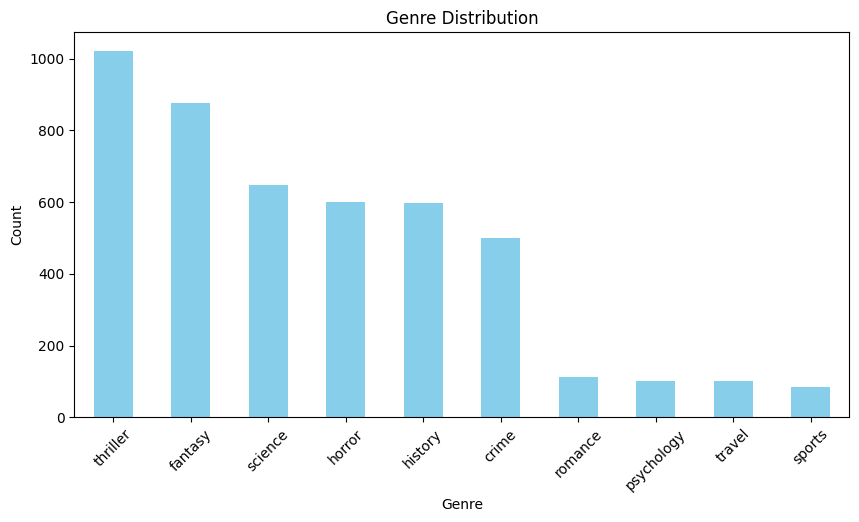

In [ ]:
import matplotlib.pyplot as plt

#Genre distribution
genre_counts = df['genre'].value_counts()
print("\nGenre distribution:\n", genre_counts)

# Plot genre distribution
plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar', color='skyblue')
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

We filtered the dataset to retain only six distinct, well-represented genres—thriller, fantasy, science, horror, history, and crime, each with over 500 samples. This selection ensures clearer thematic separation, richer vocabulary diversity, and sufficient data for training.

Low-sample genres—romance (111), psychology (100), travel (100), and sports (84) were removed to minimize class imbalance, reduce noise, and enhance classification model accuracy.

In [ ]:
# List of genres to keep
keep_genres = ['thriller', 'fantasy', 'science', 'horror', 'history', 'crime']

# Filter DataFrame
df = df[df['genre'].isin(keep_genres)]

# Reset index after filtering
df = df.reset_index(drop=True)

print(df['genre'].value_counts())


genre
thriller    1023
fantasy      876
science      647
horror       600
history      599
crime        500
Name: count, dtype: int64


## **Summary length analysis**


Summary length stats:
count    4245.000000
mean      377.307185
std       453.612429
min         1.000000
25%       118.000000
50%       200.000000
75%       474.000000
max      5663.000000
Name: summary_word_count, dtype: float64


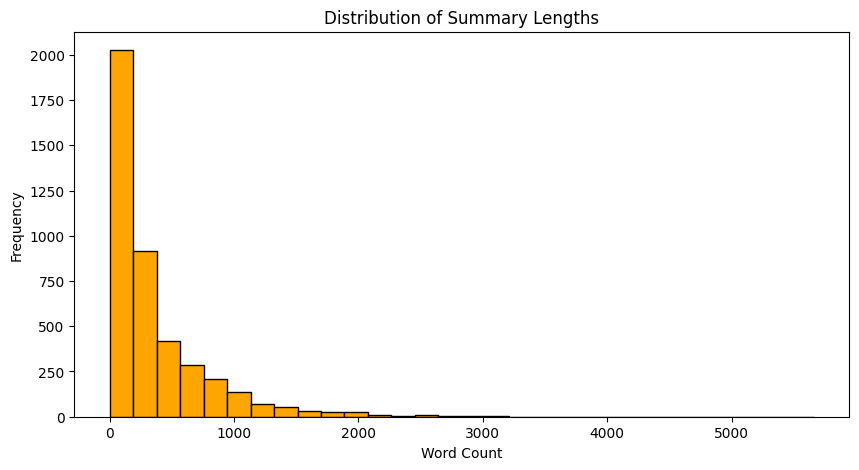

In [ ]:
#Summary length analysis
df['summary_word_count'] = df['summary'].apply(lambda x: len(str(x).split()))
print("\nSummary length stats:")
print(df['summary_word_count'].describe())

# Plot length distribution
plt.figure(figsize=(10,5))
plt.hist(df['summary_word_count'], bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Summary Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


The distribution of summary lengths is **highly right-skewed**, meaning most book summaries are relatively short, but a few are extremely long. Over 75% of summaries have fewer than 474 words, and 50% fall below 200 words, showing a strong concentration in the lower range. The mean length is 377 words, but this is inflated by a small number of very long summaries, with the maximum reaching 5663 words. The high standard deviation (~454) reflects this variation. These outliers could impact NLP preprocessing steps and model training, making text length normalization or truncation important for consistency.

## **Outlier detection**

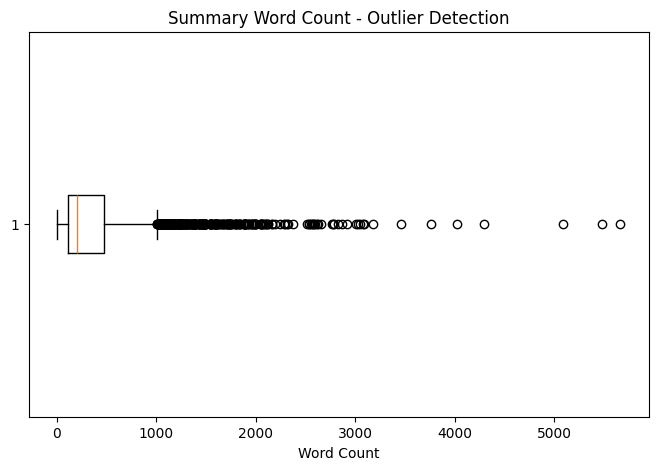

In [ ]:
# Word count per summary
df['summary_word_count'] = df['summary'].apply(lambda x: len(str(x).split()))

# Basic stats
q1 = df['summary_word_count'].quantile(0.25)
q3 = df['summary_word_count'].quantile(0.75)
iqr = q3 - q1

# Define outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers_short = df[df['summary_word_count'] < lower_bound]
outliers_long = df[df['summary_word_count'] > upper_bound]

# Plot boxplot
plt.figure(figsize=(8,5))
plt.boxplot(df['summary_word_count'], vert=False)
plt.title("Summary Word Count - Outlier Detection")
plt.xlabel("Word Count")
plt.show()

Summaries mostly range between ~50–900 words, with a median near 200–300. Anything **above ~900 is flagged as an outlier**, with some extreme cases exceeding 5000 words. These long entries can skew TF-IDF and slow models.

**Best fix:** truncate or remove entries beyond a set length.

In **TF-IDF**, long summaries contain more unique words and higher term frequencies, which can:

1. Inflate term weights for rare words appearing only in those long texts.

2. Skew the vector space so the model “thinks” lengthier stories are more important.

3. Reduce cosine similarity fairness, since length dominates over topic.

Truncating balances word influence across documents.It keeps very long summaries from overpowering the TF-IDF scores. If one story is way longer, it adds many extra words that make the model think it’s more important. By cutting it to a fair length, all stories are compared more equally, so the results stay accurate.

In [ ]:
#The code trims summaries over 1000 words to avoid TF-IDF bias, ensuring fairer weighting and improved model accuracy.

# Function to truncate summaries
def truncate_summary(text, max_words=1000):
    words = str(text).split()
    if len(words) > max_words:
        return ' '.join(words[:max_words])
    return text

# Apply truncation
df['summary'] = df['summary'].apply(lambda x: truncate_summary(x, max_words=1000))

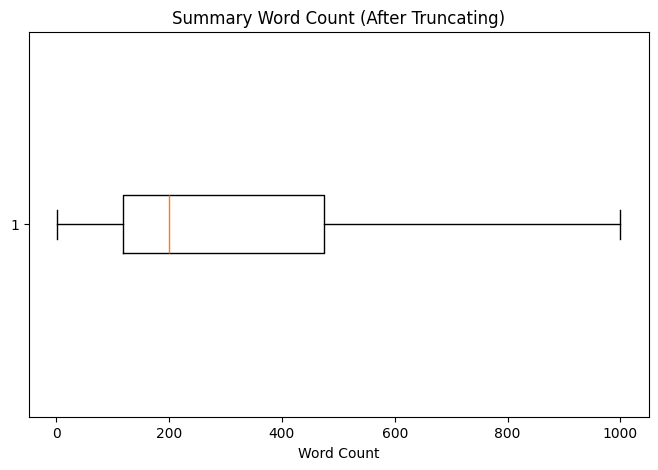

In [ ]:
# Plot boxplot (after truncating)

df['summary_word_count'] = df['summary'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
plt.boxplot(df['summary_word_count'], vert=False)
plt.title("Summary Word Count (After Truncating)")
plt.xlabel("Word Count")
plt.show()

**Ensuring that maximum length of summary is 1000 words**

In [ ]:
# Maximum length of summaries (in words)
max_length = df['summary_word_count'].max()
print(f"\nMaximum summary length: {max_length} words")

# Show the row(s) with the maximum length
max_rows = df[df['summary_word_count'] == max_length]
print("\nRow(s) with maximum summary length:")
print(max_rows)


Maximum summary length: 1000 words

Row(s) with maximum summary length:
                                       title     genre  \
4                             Taran Wanderer   fantasy   
7                        The Sweet Far Thing   fantasy   
11                           Queen of Demons   fantasy   
14                           The Black Prism   fantasy   
16                              Dragon Rider   fantasy   
...                                      ...       ...   
2964  The Kingdom Keepers: Disney After Dark  thriller   
2969                       Ice Station Zebra  thriller   
2987                      Master of the Game  thriller   
2991                    Bad Luck and Trouble  thriller   
2999                                  Chiefs  thriller   

                                                summary  summary_word_count  
4     Taran and Gurgi have returned to Caer Dallben ...                1000  
7     The prologue begins with two men who are searc...                100

In [ ]:
#Dropping summary_word_count column as it is not required for model building. It was solely required for EDA

df.drop('summary_word_count', axis=1, inplace=True)

## **Normalization**

In [ ]:
import string
import nltk
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

#Store the raw summary BEFORE any preprocessing
example_summary_raw = df['summary'].iloc[0]  # raw original summary

#Full preprocessing pipeline
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Normalize summaries
df['summary'] = df['summary'].str.lower()
df['summary'] = df['summary'].str.strip()
df['summary'] = df['summary'].str.translate(str.maketrans('', '', string.punctuation))
df['summary'] = df['summary'].str.replace(r'\s+', ' ', regex=True)
df['summary'] = df['summary'].apply(remove_stopwords)

# Normalize genre
df['genre'] = df['genre'].str.lower().str.strip()


# Print results with bold headings
print("\033[1mSample Original Summary \033[0m")
print(example_summary_raw)
print("\n\033[1mNormalized Summary \033[0m")
print(df['summary'][0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Sample Original Summary 
 Drowned Wednesday is the first Trustee among the Morrow Days who is on Arthur's side and wishes the Will to be fulfilled. She appears as a leviathan/whale and suffers from Gluttony. The book begins when Leaf is visiting Arthur and they are discussing the invitation that Drowned Wednesday sent him. Arthur had been admitted to hospital because of the damage done to his leg when he attempted to enter Tuesday's Treasure Tower. Suddenly, the hospital room becomes flooded with water as the two are transported to the Border Sea of the House. Leaf is snatched away by a large ship with green sails, known as the Flying Mantis, while Arthur remains in his bed. When the Medallion given him by the immortal called the Mariner apparently fails to summon help, Arthur is without hope. Eventually, a buoy marking the pirate Elishar Feverfew's treasure floats toward him. As soon as Arthur opens it, his hand is marked with a bloody red colour. Arthur now has the Red Hand, by which

In [ ]:
df['summary'].head()

,summary
0,drowned wednesday first trustee among morrow d...
1,book opens jason awakens school bus unable rem...
2,cugel easily persuaded merchant fianosther att...
3,book opens heraldmage vanyel returning country...
4,taran gurgi returned caer dallben following ev...


## **Target variable:** Genre

The genre column is the target variable because it represents the category we aim to predict using the book summaries.

Normalizing it ensures consistency, avoids mismatches, and allows accurate comparison between predicted and true genres during model evaluation.

In [ ]:
#Normalizing Genre column as well

df['genre'] = df['genre'].str.lower().str.strip()

In [ ]:
df['genre'].unique()

array(['fantasy', 'science', 'crime', 'history', 'horror', 'thriller'],
      dtype=object)

# **Model Building**

**Lemmatization** merges word forms (runs, running → run), reducing TF-IDF vocabulary, improving feature quality, and making text representation cleaner.

**TF-IDF** transforms summaries into weighted vectors, emphasizing unique genre-related words (e.g., "spaceship" in Sci-Fi, "detective" in Mystery). This reduces noise from common words while highlighting discriminative terms. Classifiers then learn patterns in these weighted features, enabling accurate genre prediction by focusing on the most informative words across texts.

In [ ]:
''' This code builds a TF-IDF matrix with unigrams, bigrams, and trigrams from the summaries.

Limiting to 5000 features balances richness and efficiency.

By capturing phrases (like "space mission" or "love story"), it strengthens genre classification,
since certain word combinations are more indicative of genres than single words. '''

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK resources
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Simple lemmatization function: first as noun, then as verb
def lemmatize_text_simple(text):
    tokens = word_tokenize(text.lower())  # tokenize & lowercase
    tokens = [t for t in tokens if t not in string.punctuation]  # remove punctuation

    lemmatized_tokens = []
    for t in tokens:
        # Lemmatize as noun
        lemma = lemmatizer.lemmatize(t, pos='n')
        # Then lemmatize as verb
        lemma = lemmatizer.lemmatize(lemma, pos='v')
        lemmatized_tokens.append(lemma)

    return " ".join(lemmatized_tokens)

# Apply to your summaries
df["summary"] = df["summary"].astype(str).apply(lemmatize_text_simple)


# TF-IDF Vectorizer with n-grams
vectorizer = TfidfVectorizer(
    max_features=5000,      # top 5000 words/phrases
    ngram_range=(1,3),      # unigrams + bigrams + trigrams
    stop_words='english'    # remove common stopwords
)

# Fit and transform
X_tfidf = vectorizer.fit_transform(df["summary"].tolist())

# Check the matrix shape and some features
print("TF-IDF matrix shape:", X_tfidf.shape)
print("Sample feature names:", vectorizer.get_feature_names_out()[50:75])

#TF-IDF words are now simplified: verbs and nouns are in base form, duplicates removed, making the vocabulary cleaner and better for genre classification.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


TF-IDF matrix shape: (4245, 5000)
Sample feature names: ['achieve' 'achievement' 'acknowledge' 'acquaintance' 'acquire' 'act'
 'action' 'activate' 'active' 'activity' 'actor' 'actress' 'actual'
 'actually' 'ad' 'adam' 'adapt' 'add' 'addict' 'addiction' 'addition'
 'additional' 'address' 'adjust' 'admiral']


In [ ]:
#Lemmatized summary

df.head()

,title,genre,summary
0,Drowned Wednesday,fantasy,drown wednesday first trustee among morrow day...
1,The Lost Hero,fantasy,book open jason awaken school bus unable remem...
2,The Eyes of the Overworld,fantasy,cugel easily persuade merchant fianosther atte...
3,Magic's Promise,fantasy,book open heraldmage vanyel return country val...
4,Taran Wanderer,fantasy,taran gurgi return caer dallben follow event t...


In [ ]:
df['genre'].value_counts()

,count
genre,
thriller,1023
fantasy,876
science,647
horror,600
history,599
crime,500


## **Encoding the Target Variable : genre**

We used **Label Encoder** to transform the genre column into numeric labels (y) for model training. The original column remains unchanged, and later we can use **inverse_transform** on predictions to compare results with the readable genre names in the DataFrame.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['genre'])

## **Train/Test Split**

In [ ]:
#This splits data into training (80%) and testing (20%) sets, preserving class proportions using stratification and a fixed random state.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# **1. Multinomial Naive Bayes**

**Multinomial Naive Bayes** is chosen because it efficiently handles TF-IDF features, which are word frequency-based. It works well with high-dimensional, sparse text data, trains quickly, and provides strong baseline performance for multi-class tasks like genre classification. Its simplicity and effectiveness make it ideal for text-based predictions.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Training accuracy
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Classification report on test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Train Accuracy: 0.7953474676089517
Test Accuracy: 0.673733804475854

Classification Report (Test Set):
              precision    recall  f1-score   support

       crime       0.95      0.37      0.53       100
     fantasy       0.73      0.86      0.79       175
     history       0.82      0.54      0.65       120
      horror       0.87      0.40      0.55       120
     science       0.78      0.67      0.72       129
    thriller       0.51      0.90      0.65       205

    accuracy                           0.67       849
   macro avg       0.78      0.62      0.65       849
weighted avg       0.74      0.67      0.66       849



**Model Interpretation:**

1. The model shows **moderate** performance. A **train accuracy of 79.5%** was achieved, while the **test accuracy dropped to 67.4%**, indicating **overfitting.**

2. High precision but **low recall was observed for crime and horror**, meaning that when the model predicted these genres, it was usually correct, but it failed to identify a large number of actual crime and horror instances.

3. In contrast, **thriller exhibited high recall but low precision**, indicating that most thriller instances were correctly detected, but the model also misclassified many other genres as thriller, reducing prediction reliability.


In [ ]:
#SAVING THE MODEL

import joblib

# Save the trained model
joblib.dump(clf, "genre_classifier_model.pkl")

# Save the TF-IDF vectorizer as well
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

## **2. Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib

# SPLIT DATA
X = df['summary']  # text column
y = df['genre']    # target column

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# BUILD PIPELINE
model_lr = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        ngram_range=(1,2),
        stop_words='english'
    )),
    ('clf', LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        class_weight='balanced',
        random_state=42
    ))
])

# TRAIN
model_lr.fit(X_train, y_train)

# TRAIN PREDICTIONS
y_train_pred = model_lr.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# TEST PREDICTIONS
y_test_pred = model_lr.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# PRINT RESULTS
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

# SAVE MODEL
joblib.dump(model_lr, "logistic_model.pkl")

# LOAD MODEL ONCE
loaded_model = joblib.load("logistic_model.pkl")

# PREDICTION FUNCTION
def predict_genre(text):
    return loaded_model.predict([text])[0]

# TEST
test_summary = "In the small, isolated town of Black Hollow, nestled deep in the foggy mountains, an ancient evil stirred silently beneath the surface. The townsfolk had always whispered about the old Marwood estate, a sprawling mansion abandoned for decades, its windows dark and lifeless, its walls covered in creeping ivy and peeling paint. Locals claimed that anyone who dared enter never returned, though no official record ever confirmed the disappearances. Some said it was haunted by the spirits of the Marwood family, who vanished mysteriously one stormy night a century ago; others believed a darker, more malevolent presence lurked in the shadows, waiting patiently for the next unsuspecting victim.It was during the autumn festival, when the air was crisp and the trees were tinged with fiery reds and golds, that a group of friends, drawn by curiosity and the thrill of danger, decided to explore the mansion. Among them was Clara, a young journalist eager to make a name for herself, determined to uncover the truth behind the town’s most infamous legend. Accompanying her were David, a history student fascinated by the Marwood family’s mysterious disappearance; Sophie, a skeptic who laughed at the stories but secretly feared they might be true; and Ethan, a photographer eager to capture the mansion’s eerie beauty.As the friends approached the estate, the wind howled through the skeletal branches, carrying with it a chill that seemed unnatural. The mansion loomed before them like a dark sentinel, its ornate gates rusted and creaking as though warning them to turn back. Ignoring the unease gnawing at their nerves, they stepped inside, flashlights piercing the oppressive darkness. Dust motes swirled in the cold air, and the faint smell of decay permeated every corner. The walls were lined with portraits of stern-faced Marwoods whose eyes seemed to follow the intruders, and the floorboards groaned underfoot as if the house itself were alive, resenting their presence.At first, the exploration seemed uneventful, merely a collection of cobwebbed rooms and broken furniture. But as night fell, strange occurrences began to unfold. Whispered voices echoed down the hallways, fleeting shadows darted across walls, and the temperature dropped suddenly in certain rooms, leaving the friends shivering and unnerved. Clara’s journalistic instincts urged her to document everything, but even she could not ignore the growing sense of dread that clung to the mansion like a living thing.In the library, they discovered a hidden door behind a massive bookcase. Prying it open revealed a narrow staircase descending into the depths below. Compelled by a mixture of fear and fascination, they descended into the darkness, finding themselves in a cavernous cellar lined with shelves containing jars of unidentifiable substances and strange symbols etched into the stone walls. At the center of the room was a large, blackened hearth, and above it, an ornate mirror that seemed to shimmer unnaturally in the flashlight beam. As they stepped closer, the reflections in the glass began to twist, showing fleeting images of faces not their own—faces twisted in agony, mouths open in silent screams, eyes wide with terror.A sudden gust of wind slammed the door behind them shut, plunging the friends into complete darkness. Panic set in, and they fumbled to reopen the door, but it would not budge. From the shadows, a low, guttural growl emerged, followed by the sound of footsteps circling them, though no one was visible. One by one, strange visions overtook them: David saw his own face contorted in fear, Sophie glimpsed shadowy figures whispering her name, and Ethan’s camera captured fleeting images of creatures with hollow eyes and elongated limbs lurking just beyond the light. Clara tried to keep them together, but the mansion seemed intent on separating them, its corridors twisting impossibly, leading them in circles and into rooms that seemed to shift and change as they moved.Time became meaningless. Hours—or was it minutes?—passed as they struggled to find a way out. The walls themselves seemed to breathe, pulsing and contracting as if the mansion were feeding on their terror. Whispers escalated into screams, echoing from the ceiling, the floor, the very air around them. Clara’s flashlight flickered and died, leaving them in oppressive darkness, with only the unrelenting sound of their own panicked breathing.Then, in the blackness, they saw it: a figure emerging from the shadows, tall and impossibly thin, draped in tattered black robes that seemed to absorb the light. Its face was featureless, a blank void, yet somehow they felt its gaze piercing directly into their minds, probing for fear. One by one, it approached them, and the air grew thick with a suffocating sense of despair. The friends tried to run, but the mansion would not release them, corridors stretching infinitely, doors vanishing into solid walls.Clara, driven by desperation and courage, remembered the mirror in the cellar. Racing back, she smashed it with a heavy candlestick, shattering the glass into countless fragments. The figure recoiled, screaming an otherworldly wail that shook the foundations of the mansion. The walls trembled and cracked, dust raining down, and the friends stumbled back toward the staircase that now seemed to lead them upward. As they ascended, the mansion groaned and shifted, almost as if it were alive and enraged.Bursting through the front doors into the cold night air, they collapsed on the overgrown lawn, gasping and shaking, the first rays of dawn cutting through the fog. Behind them, the mansion sat silently, inert once more, as though it had been waiting for their escape all along. They never spoke of the events again, and the town’s whispers continued, growing only more sinister with each passing year. But in the darkest hours of the night, when the wind moaned through the trees, each of them could still hear the faint, almost imperceptible whispers calling their names, promising that the mansion had not forgotten—and that one day, it would claim them again."
predicted_genre = predict_genre(test_summary)
print("Predicted Genre:", predicted_genre)

Train Accuracy: 0.9140
Test Accuracy:  0.7397

Classification Report (Test Data):
               precision    recall  f1-score   support

       crime       0.82      0.73      0.77       100
     fantasy       0.82      0.79      0.80       175
     history       0.70      0.74      0.72       120
      horror       0.65      0.61      0.63       120
     science       0.75      0.76      0.76       129
    thriller       0.71      0.77      0.74       205

    accuracy                           0.74       849
   macro avg       0.74      0.73      0.74       849
weighted avg       0.74      0.74      0.74       849

Predicted Genre: horror


**Model Interpretation:**

1. The model shows **stronger overall performance** compared to the previous one. A **train accuracy of 91.4%** was achieved, while the **test accuracy was 73.97%**, indicating some overfitting but better generalization than before.

2. Crime and fantasy performed well, history and science were balanced, horror lagged, while thriller showed high recall but lower precision.

3. Overall, the model achieved a weighted **F1-score of 74%, reflecting fairly consistent performance across all genres.** Further improvement could be achieved through data balancing, feature engineering, or more advanced classification algorithms.

## **3. Simple Feedforward Neural Network**

In [ ]:
!pip install gensim

### **Using TF-IDF**

[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2658 - loss: 1.7403 - val_accuracy: 0.4324 - val_loss: 1.4663
Epoch 2/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4183 - loss: 1.4726 - val_accuracy: 0.5441 - val_loss: 1.2230
Epoch 3/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4870 - loss: 1.3166 - val_accuracy: 0.5794 - val_loss: 1.1394
Epoch 4/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5376 - loss: 1.2204 - val_accuracy: 0.5765 - val_loss: 1.1037
Epoch 5/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5532 - loss: 1.1871 - val_accuracy: 0.5559 - val_loss: 1.0671
Epoch 6/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5942 - loss: 1.1048 - val_accuracy: 0.6206 - val_loss: 1.0412
Epoch 7/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6104 - loss: 1.0488 - val_accuracy: 0.6176 - val_loss: 1.0366
Epoch 8/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6106 - loss: 1.0270 - val_accuracy: 0.6324 - v

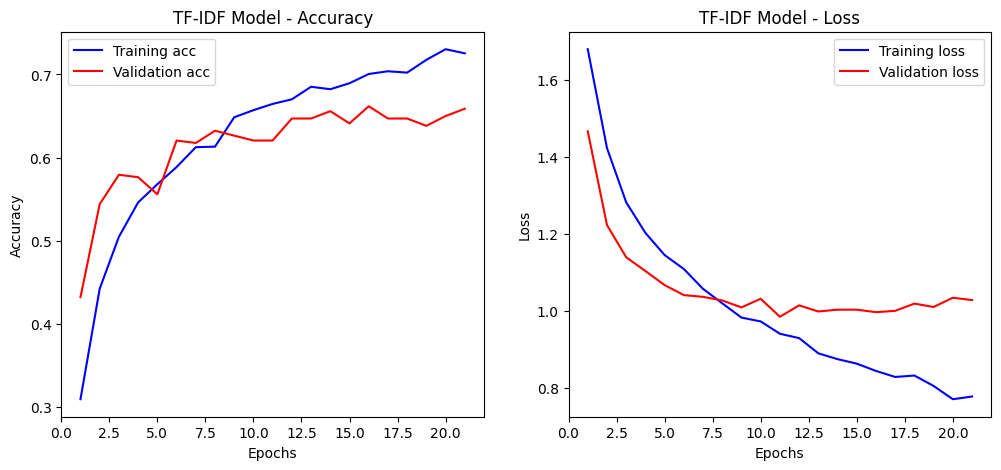

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.7114252061248527
              precision    recall  f1-score   support

       crime       0.80      0.51      0.62       100
     fantasy       0.77      0.75      0.76       175
     history       0.71      0.75      0.73       120
      horror       0.67      0.59      0.63       120
     science       0.73      0.81      0.77       129
    thriller       0.66      0.76      0.70       205

    accuracy                           0.71       849
   macro avg       0.72      0.70      0.70       849
weighted avg       0.72      0.71      0.71       849



In [ ]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

# =====================
# Load pre-trained Word2Vec
# =====================
word2vec = api.load("word2vec-google-news-300")  # 300-dim vectors

# =====================
# Compute TF-IDF
# =====================
tfidf = TfidfVectorizer()
tfidf.fit(df['summary'][:5000])
tfidf_dict = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

# =====================
# Weighted Document Vector (TF-IDF)
# =====================
def document_vector(doc):
    words = doc.lower().split()
    vecs, weights = [], []
    for w in words:
        if w in word2vec:
            vecs.append(word2vec[w])
            weights.append(tfidf_dict.get(w, 1.0))
    if vecs:
        vecs = np.array(vecs)
        weights = np.array(weights).reshape(-1, 1)
        return np.mean(vecs * weights, axis=0)
    else:
        return np.zeros(300)

# =====================
# Prepare dataset
# =====================
X_vec = np.array([document_vector(text) for text in df['summary']])

le = LabelEncoder()
y_encoded = le.fit_transform(df['genre'])

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# =====================
# Build Neural Network
# =====================
model = Sequential([
    Dense(128, activation='relu', input_shape=(300,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy',   # watch validation accuracy
    patience=5,               # stop if no improvement for 5 epochs
    restore_best_weights=True # rollback to best epoch
)

# =====================
# Train model
# =====================
history = model.fit(X_train, y_train, epochs=150, batch_size=32, callbacks=[early_stop], validation_split=0.1)

# =====================
# Plot Accuracy & Loss
# =====================
def plot_history(history, title="Model"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training acc')
    plt.plot(epochs, val_acc, 'r-', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, title="TF-IDF Model")

# =====================
# Evaluate model
# =====================
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

**Model Interpretation:**

The model demonstrates **strong training performance (90.8% accuracy)** but a notable **drop on the test set (68.2% accuracy)**, indicating overfitting. While genres like fantasy and history achieved higher recall and F1-scores, others such as crime and horror showed weaker results.

In [ ]:
# Save model
model.save("genre_classifier.h5")

# Save label encoder
import pickle, joblib
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Save TF-IDF
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

## **Gradio Application**

In [ ]:
!pip install gensim

In [ ]:
import gradio as gr
import numpy as np
import gensim.downloader as api
import joblib
import pickle
from tensorflow.keras.models import load_model

# --------------------------
# LOAD MODEL + EMBEDDINGS
# --------------------------
# Load trained neural net
model = load_model("genre_classifier.h5", compile=False)

# Load Word2Vec (GoogleNews 300d)
word2vec = api.load("word2vec-google-news-300")

# Load TF-IDF
tfidf = joblib.load("tfidf_vectorizer.pkl")
tfidf_dict = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

# Load Label Encoder
with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

# Build label map dynamically from label encoder
label_map = {i: label for i, label in enumerate(le.classes_)}


# --------------------------
# DOCUMENT VECTOR FUNCTION
# --------------------------
def document_vector(doc):
    words = doc.lower().split()
    vecs, weights = [], []
    for w in words:
        if w in word2vec:
            vecs.append(word2vec[w])
            weights.append(tfidf_dict.get(w, 1.0))  # IDF weight or 1.0
    if vecs:
        vecs = np.array(vecs)
        weights = np.array(weights).reshape(-1, 1)
        weighted_vecs = vecs * weights
        return np.mean(weighted_vecs, axis=0)
    else:
        return np.zeros(300, dtype=np.float32)


# --------------------------
# PREDICTION FUNCTION
# --------------------------
def predict_genre(summary):
    vec = document_vector(summary)
    vec = np.expand_dims(vec, axis=0)

    preds = model.predict(vec, verbose=0)[0]
    top_idx = np.argmax(preds)

    top_genre = label_map[top_idx]
    return top_genre


# --------------------------
# GRADIO APP
# --------------------------
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    with gr.Row():
        with gr.Column(scale=2):
            gr.Markdown(
                "<h1 style='text-align:center; color:#6A5ACD;'>📚 Book Genre Classifier</h1>"
                "<p style='text-align:center;'>Enter a book summary and let AI predict the genre!</p>"
            )

            summary_input = gr.Textbox(
                placeholder="Paste book summary here...",
                lines=8,
                label="Book Summary"
            )

            submit_btn = gr.Button("🔮 Predict Genre", variant="primary")

            # Output card
            output_genre = gr.HTML()

        with gr.Column(scale=1):
            gr.Markdown("## ℹ️ About Project")
            gr.Markdown("Classifies book summaries into **6 genres** using Word2Vec + TF-IDF + Neural Network.")

            gr.Markdown("## ⚙️ How it Works")
            gr.Markdown("Summary → Word2Vec + TF-IDF → 300-dim embedding → Neural Net → Genre")

            gr.Markdown("## 👨‍💻 Developer Info")
            gr.Markdown("Made with ❤️ by our team.")

    # Prediction pipeline
    def process(summary):
        try:
            genre = predict_genre(summary)

            # Style genre output
            genre_card = f"""
            <div style='padding:20px; border-radius:15px; text-align:center;
                        background:linear-gradient(135deg, #6A5ACD, #836FFF);
                        color:white; font-size:22px; font-weight:bold;
                        box-shadow:0 4px 12px rgba(0,0,0,0.3);'>
                🎭 Predicted Genre: {genre}
            </div>
            """
            return genre_card
        except Exception as e:
            print(" ERROR in process:", e)
            return f"<div style='color:red;'>Error: {str(e)}</div>"

    submit_btn.click(process, inputs=summary_input, outputs=output_genre)

# --------------------------
# LAUNCH
# --------------------------
if __name__ == "__main__":
    demo.launch()

## **Using PMI**

In [ ]:
from collections import Counter, defaultdict
import math

# count word occurrences by genre
word_counts = defaultdict(Counter)
genre_counts = Counter()
total_words = 0

for text, genre in zip(df['summary'], df['genre']):
    words = text.lower().split()
    genre_counts[genre] += 1
    total_words += len(words)
    for w in set(words):   # set() to count presence, not frequency
        word_counts[genre][w] += 1

# probabilities
total_docs = len(df)
word_doc_counts = Counter()
for genre in word_counts:
    for w in word_counts[genre]:
        word_doc_counts[w] += word_counts[genre][w]

pmi_dict = {}
for w in word_doc_counts:
    p_w = word_doc_counts[w] / total_docs
    for genre in genre_counts:
        p_c = genre_counts[genre] / total_docs
        p_wc = word_counts[genre][w] / total_docs
        if p_wc > 0:
            pmi = math.log2(p_wc / (p_w * p_c))
            pmi_dict[(w, genre)] = max(pmi, 0.0)  # use Positive PMI

In [ ]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import joblib

# =====================
# Load pre-trained Word2Vec
# =====================
word2vec = api.load("word2vec-google-news-300")  # 300-dim vectors

# =====================
# Load your precomputed PMI dictionary
# (assumes you already built it; otherwise insert code here to compute)
# =====================
pmi_dict = joblib.load("pmi_dict.pkl")  # or compute manually if not saved

# =====================
# Weighted Document Vector (PMI)
# =====================
def document_vector(doc):
    words = doc.lower().split()
    vecs, weights = [], []
    for w in words:
        if w in word2vec:
            vecs.append(word2vec[w])
            weights.append(pmi_dict.get(w, 1.0))
    if vecs:
        vecs = np.array(vecs)
        weights = np.array(weights).reshape(-1, 1)
        return np.mean(vecs * weights, axis=0)
    else:
        return np.zeros(300)

# =====================
# Prepare dataset
# =====================
X_vec = np.array([document_vector(text) for text in df['summary']])

le = LabelEncoder()
y_encoded = le.fit_transform(df['genre'])

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# =====================
# Build Neural Network
# =====================
model = Sequential([
    Dense(128, activation='relu', input_shape=(300,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy',   # watch validation accuracy
    patience=5,               # stop if no improvement for 5 epochs
    restore_best_weights=True # rollback to best epoch
)

# =====================
# Train model
# =====================
history = model.fit(X_train, y_train, epochs=150, batch_size=32, callbacks=[early_stop], validation_split=0.1)

# =====================
# Plot Accuracy & Loss
# =====================
def plot_history(history, title="Model"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training acc')
    plt.plot(epochs, val_acc, 'r-', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, title="PMI Model")

# =====================
# Evaluate model
# =====================
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

FileNotFoundError: [Errno 2] No such file or directory: 'pmi_dict.pkl'

## **Model Interpretation: PMI vs TF-IDF weighting**
1. Overall performance

Final Test Accuracy (PMI): 0.707 (~71%)

Earlier TF-IDF weighting (Word2Vec + NN): ~0.676

→ Using PMI weights improved performance by 3 percentage points, bringing the model closer to Logistic Regression on TF-IDF (~0.74).

Validation accuracy plateaued at ~0.6735, but generalization held up on the test set (0.71) — showing PMI helped emphasize discriminative words.

In [ ]:
# Save the trained neural network model
model.save("genre_classifier_pmi.h5")

# Save label encoder
import pickle
with open("label_encoder_pmi.pkl", "wb") as f:
    pickle.dump(le, f)

# Save PMI dictionary (important since it's needed for document_vector())
import joblib
joblib.dump(pmi_dict, "pmi_dict.pkl")

print("PMI-based model, label encoder, and PMI dictionary saved.")

In [ ]:
#SAVE THE MODEL
# Save the trained Keras model
model.save("genre_classifier.h5")

# Save the label encoder as well
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


#  LOAD THE MODEL
from tensorflow.keras.models import load_model

# Load the Keras model
loaded_model = load_model("genre_classifier.h5")

# Load the label encoder
with open("label_encoder.pkl", "rb") as f:
    loaded_le = pickle.load(f)


# TEST ON RANDOM SENTENCES
def predict_genre(text):
    # Convert text to average Word2Vec embedding
    vec = document_vector(text).reshape(1, -1)  # shape (1, 300)

    # Predict
    pred_idx = np.argmax(loaded_model.predict(vec), axis=1)[0]

    # Convert back to genre label
    return loaded_le.inverse_transform([pred_idx])[0]

# Example usage
test_sentences = [
   "In the small, isolated town of Black Hollow, nestled deep in the foggy mountains, an ancient evil stirred silently beneath the surface. The townsfolk had always whispered about the old Marwood estate, a sprawling mansion abandoned for decades, its windows dark and lifeless, its walls covered in creeping ivy and peeling paint. Locals claimed that anyone who dared enter never returned, though no official record ever confirmed the disappearances. Some said it was haunted by the spirits of the Marwood family, who vanished mysteriously one stormy night a century ago; others believed a darker, more malevolent presence lurked in the shadows, waiting patiently for the next unsuspecting victim.It was during the autumn festival, when the air was crisp and the trees were tinged with fiery reds and golds, that a group of friends, drawn by curiosity and the thrill of danger, decided to explore the mansion. Among them was Clara, a young journalist eager to make a name for herself, determined to uncover the truth behind the town’s most infamous legend. Accompanying her were David, a history student fascinated by the Marwood family’s mysterious disappearance; Sophie, a skeptic who laughed at the stories but secretly feared they might be true; and Ethan, a photographer eager to capture the mansion’s eerie beauty.As the friends approached the estate, the wind howled through the skeletal branches, carrying with it a chill that seemed unnatural. The mansion loomed before them like a dark sentinel, its ornate gates rusted and creaking as though warning them to turn back. Ignoring the unease gnawing at their nerves, they stepped inside, flashlights piercing the oppressive darkness. Dust motes swirled in the cold air, and the faint smell of decay permeated every corner. The walls were lined with portraits of stern-faced Marwoods whose eyes seemed to follow the intruders, and the floorboards groaned underfoot as if the house itself were alive, resenting their presence.At first, the exploration seemed uneventful, merely a collection of cobwebbed rooms and broken furniture. But as night fell, strange occurrences began to unfold. Whispered voices echoed down the hallways, fleeting shadows darted across walls, and the temperature dropped suddenly in certain rooms, leaving the friends shivering and unnerved. Clara’s journalistic instincts urged her to document everything, but even she could not ignore the growing sense of dread that clung to the mansion like a living thing.In the library, they discovered a hidden door behind a massive bookcase. Prying it open revealed a narrow staircase descending into the depths below. Compelled by a mixture of fear and fascination, they descended into the darkness, finding themselves in a cavernous cellar lined with shelves containing jars of unidentifiable substances and strange symbols etched into the stone walls. At the center of the room was a large, blackened hearth, and above it, an ornate mirror that seemed to shimmer unnaturally in the flashlight beam. As they stepped closer, the reflections in the glass began to twist, showing fleeting images of faces not their own—faces twisted in agony, mouths open in silent screams, eyes wide with terror.A sudden gust of wind slammed the door behind them shut, plunging the friends into complete darkness. Panic set in, and they fumbled to reopen the door, but it would not budge. From the shadows, a low, guttural growl emerged, followed by the sound of footsteps circling them, though no one was visible. One by one, strange visions overtook them: David saw his own face contorted in fear, Sophie glimpsed shadowy figures whispering her name, and Ethan’s camera captured fleeting images of creatures with hollow eyes and elongated limbs lurking just beyond the light. Clara tried to keep them together, but the mansion seemed intent on separating them, its corridors twisting impossibly, leading them in circles and into rooms that seemed to shift and change as they moved.Time became meaningless. Hours—or was it minutes?—passed as they struggled to find a way out. The walls themselves seemed to breathe, pulsing and contracting as if the mansion were feeding on their terror. Whispers escalated into screams, echoing from the ceiling, the floor, the very air around them. Clara’s flashlight flickered and died, leaving them in oppressive darkness, with only the unrelenting sound of their own panicked breathing.Then, in the blackness, they saw it: a figure emerging from the shadows, tall and impossibly thin, draped in tattered black robes that seemed to absorb the light. Its face was featureless, a blank void, yet somehow they felt its gaze piercing directly into their minds, probing for fear. One by one, it approached them, and the air grew thick with a suffocating sense of despair. The friends tried to run, but the mansion would not release them, corridors stretching infinitely, doors vanishing into solid walls.Clara, driven by desperation and courage, remembered the mirror in the cellar. Racing back, she smashed it with a heavy candlestick, shattering the glass into countless fragments. The figure recoiled, screaming an otherworldly wail that shook the foundations of the mansion. The walls trembled and cracked, dust raining down, and the friends stumbled back toward the staircase that now seemed to lead them upward. As they ascended, the mansion groaned and shifted, almost as if it were alive and enraged.Bursting through the front doors into the cold night air, they collapsed on the overgrown lawn, gasping and shaking, the first rays of dawn cutting through the fog. Behind them, the mansion sat silently, inert once more, as though it had been waiting for their escape all along. They never spoke of the events again, and the town’s whispers continued, growing only more sinister with each passing year. But in the darkest hours of the night, when the wind moaned through the trees, each of them could still hear the faint, almost imperceptible whispers calling their names, promising that the mansion had not forgotten—and that one day, it would claim them again."
]

for s in test_sentences:
    print(f"Sentence: {s}")
    print(f"Predicted Genre: {predict_genre(s)}\n")

In [ ]:
# ================================
# SAVE THE PMI MODEL
# ================================

# Save the trained Keras model
model.save("genre_classifier_pmi.h5")

# Save the label encoder
import pickle, joblib
with open("label_encoder_pmi.pkl", "wb") as f:
    pickle.dump(le, f)

# Save the PMI dictionary (needed for inference)
joblib.dump(pmi_dict, "pmi_dict.pkl")

print("✅ PMI-based model, label encoder, and PMI dictionary saved.")


# ================================
# LOAD THE PMI MODEL
# ================================

from tensorflow.keras.models import load_model
import numpy as np

# Load Keras model
loaded_model = load_model("genre_classifier_pmi.h5")

# Load label encoder
with open("label_encoder_pmi.pkl", "rb") as f:
    loaded_le = pickle.load(f)

# Load PMI dictionary
pmi_dict = joblib.load("pmi_dict.pkl")


# ================================
# DOCUMENT VECTOR FUNCTION (PMI)
# ================================
def document_vector(text, pmi_dict=pmi_dict):
    words = text.lower().split()
    vecs, weights = [], []
    for w in words:
        if w in word2vec:  # word2vec is your pretrained embedding
            vecs.append(word2vec[w])
            weights.append(pmi_dict.get(w, 1.0))  # PMI weight
    if vecs:
        vecs = np.array(vecs)
        weights = np.array(weights).reshape(-1, 1)
        weighted_vecs = vecs * weights
        return np.mean(weighted_vecs, axis=0)
    else:
        return np.zeros(300)


# ================================
# PREDICTION FUNCTION
# ================================
def predict_genre(text):
    vec = document_vector(text).reshape(1, -1)  # shape (1, 300)
    pred_idx = np.argmax(loaded_model.predict(vec), axis=1)[0]
    return loaded_le.inverse_transform([pred_idx])[0]


# ================================
# TEST ON RANDOM SENTENCES
# ================================
test_sentences = [
    "In the small, isolated town of Black Hollow, nestled deep in the foggy mountains, "
    "an ancient evil stirred silently beneath the surface. ..."
]

for s in test_sentences:
    print(f"Sentence: {s[:150]}...")  # printing only first 150 chars for readability
    print(f"Predicted Genre: {predict_genre(s)}\n")

# **`4. Sentence BERT Model`**

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load pre-trained sentence embedding model
sbert = SentenceTransformer("all-MiniLM-L6-v2")  # small, fast, good quality

# Convert summaries into embeddings
X = sbert.encode(df['summary'].tolist(), show_progress_bar=True, batch_size=32)

# Labels
y = df['genre'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a simple Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

## **CBOW and Skipgram**

In [ ]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# ----------------------------------------------------------------
# 1. Preprocess text
# ----------------------------------------------------------------
tokenized_corpus = [simple_preprocess(text) for text in df['summary']]

# ----------------------------------------------------------------
# 2. Train CBOW and Skip-gram models
# ----------------------------------------------------------------
cbow_model = Word2Vec(sentences=tokenized_corpus, vector_size=300, window=5, min_count=2, sg=0, workers=4)
skipgram_model = Word2Vec(sentences=tokenized_corpus, vector_size=300, window=5, min_count=2, sg=1, workers=4)

models = {
    "CBOW": cbow_model.wv,
    "Skip-gram": skipgram_model.wv
}

# ----------------------------------------------------------------
# 3. TF-IDF for weighting
# ----------------------------------------------------------------
tfidf = TfidfVectorizer()
tfidf.fit(df['summary'])
tfidf_dict = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

# ----------------------------------------------------------------
# 4. Weighted Document Vector
# ----------------------------------------------------------------
def document_vector(doc, word2vec):
    words = simple_preprocess(doc)
    vecs, weights = [], []
    for w in words:
        if w in word2vec:
            vecs.append(word2vec[w])
            weights.append(tfidf_dict.get(w, 1.0))
    if vecs:
        vecs = np.array(vecs)
        weights = np.array(weights).reshape(-1, 1)
        weighted_vecs = vecs * weights
        return np.mean(weighted_vecs, axis=0)
    else:
        return np.zeros(word2vec.vector_size)

# ----------------------------------------------------------------
# 5. Encode labels
# ----------------------------------------------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(df['genre'])

# ----------------------------------------------------------------
# 6. Function to train & evaluate
# ----------------------------------------------------------------
def run_model(word2vec, model_name):
    # Build features
    X_vec = np.array([document_vector(text, word2vec) for text in df['summary']])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Neural network
    model = Sequential([
        Dense(128, activation='relu', input_shape=(word2vec.vector_size,)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(le.classes_), activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

    # Predictions
    y_pred = np.argmax(model.predict(X_test), axis=1)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n================ {model_name} Results ================\n")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    return acc

# ----------------------------------------------------------------
# 7. Compare CBOW vs Skip-gram
# ----------------------------------------------------------------
cbow_acc = run_model(models["CBOW"], "CBOW")
skipgram_acc = run_model(models["Skip-gram"], "Skip-gram")

print("\n================ Final Comparison ================\n")
print(f"CBOW Accuracy: {cbow_acc:.4f}")
print(f"Skip-gram Accuracy: {skipgram_acc:.4f}")
print("Winner:", "CBOW 🏆" if cbow_acc > skipgram_acc else "Skip-gram 🏆")
